In [72]:
import matplotlib.pyplot as plt
# from netCDF4 import Dataset
import numpy as np
import os
import rasterio as rio
import geopandas as gpd
import xarray as xr
import pickle
import rasterio
import datetime as dt
import pandas
import rioxarray as rxr
os.chdir('c:/users/marianne/documents/pe_snow_fires')

In [8]:
dir = 'c:/users/marianne/documents/data/GOSIF/data.globalecology.unh.edu/data/GOSIF-GPP_v2/Monthly/Mean'

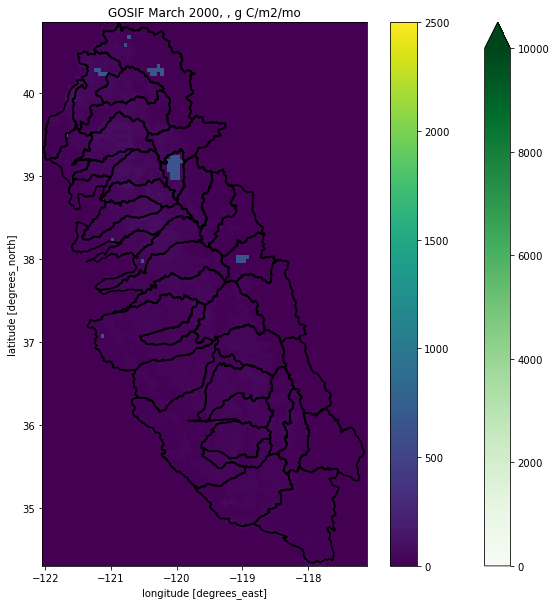

In [89]:
os.listdir(dir)
tmp = rxr.open_rasterio(dir + '/GOSIF_GPP_2000.M03_Mean.tif')
clipped = data.rio.clip(sn.geometry,all_touched=True,crs=sn.geometry.crs,from_disk=True).squeeze()
fig,ax=plt.subplots(figsize= (10,10))
clipped.plot(vmin=0, vmax = 10000, ax=ax,cmap = 'Greens')
clipped_kg = clipped
clipped_kg.plot(ax=ax,vmin=0,vmax=2500)
sn.boundary.plot(ax=ax,color = 'k')
ax.set_title('GOSIF March 2000, , g C/m2/mo')
plt.show()

In [83]:
tmp

<xarray.DataArray (band: 1, y: 3600, x: 7200)>
[25920000 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * y            (y) float64 89.97 89.92 89.88 89.83 ... -89.88 -89.93 -89.98
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [69]:
sn = gpd.read_file('data/sn_watersheds.shp')
firebounds= gpd.read_file('data/firebounds.shp')
dates=[]
dataframe=[]
for f in os.listdir(dir):
    data = rioxarray.open_rasterio(dir +'/'+ f)
    clipped = data.rio.clip(sn.geometry,all_touched=True,crs=sn.geometry.crs)
    year = f.split('GPP_')[-1].split('.M')[0]
    month = f.split('GPP_')[-1].split('.M')[1].split('_Mean')[0]
    date = dt.datetime(year = int(year),month=int(month),day = 1)
    dataframe.append(clipped)
    dates.append(date)
    
    

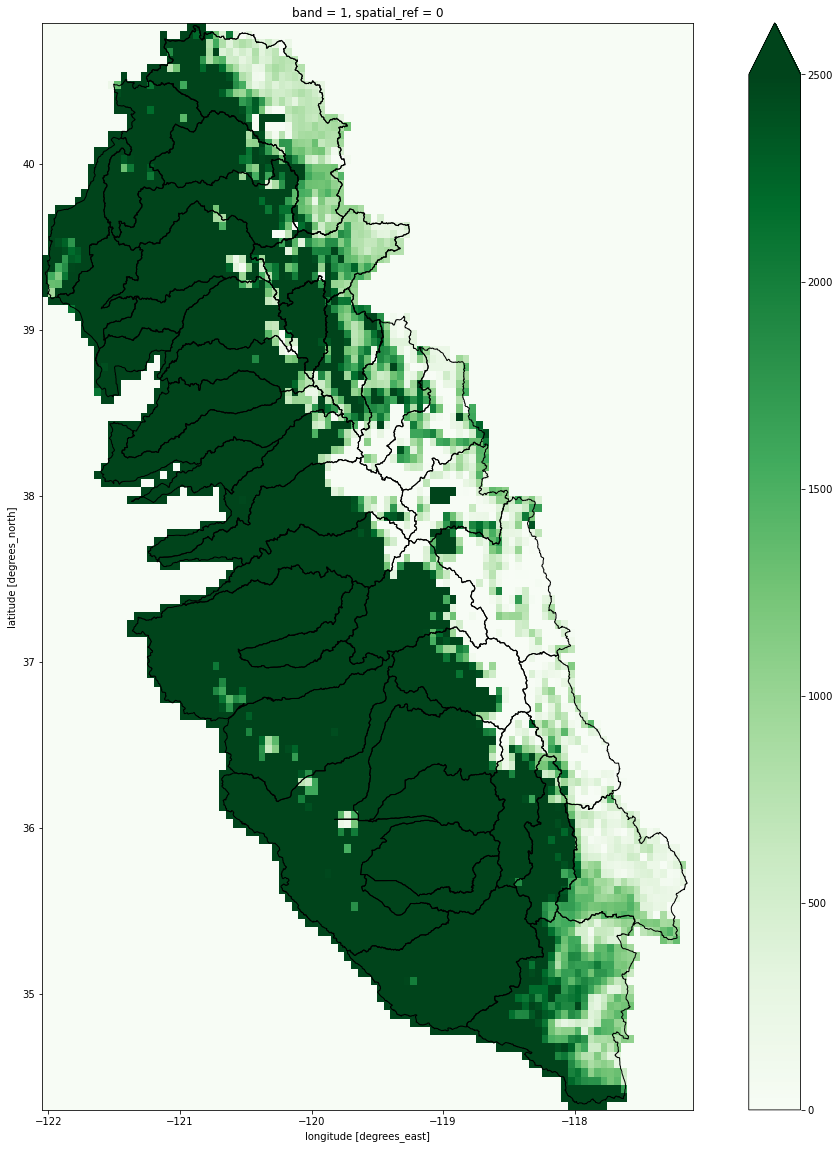

In [70]:
from rasterio.plot import plotting_extent

gosif_ext = plotting_extent(dataframe[0],
                            dataframe[0].rio.transform())

                            # View cropped data
f, ax = plt.subplots(figsize=(20,20))
dataframe[0].plot(ax=ax,cmap = 'Greens',vmin = 0,vmax=2500)
sn.boundary.plot(ax=ax, linewidth = 1,
                    color="black")
plt.show()